In [40]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [41]:
dataset=pd.read_csv("winequality-red.csv")
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [42]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [43]:
dataset.dtypes.sample(12)

quality                   int64
density                 float64
fixed acidity           float64
sulphates               float64
volatile acidity        float64
total sulfur dioxide    float64
citric acid             float64
chlorides               float64
residual sugar          float64
pH                      float64
alcohol                 float64
free sulfur dioxide     float64
dtype: object

In [44]:
dataset["quality"].unique()
y=dataset["quality"]
x=dataset.drop("quality",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [45]:
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
print(y_predict)


[6 6 5 6 5 5 6 6 6 6 5 6 6 6 7 5 6 5 6 5 6 6 5 5 5 5 5 6 5 6 5 6 6 6 6 6 6
 5 5 6 5 6 6 6 6 6 5 5 6 6 5 5 6 5 5 6 6 5 6 6 6 5 5 6 5 6 5 5 5 6 5 5 6 5
 5 6 5 5 6 6 6 6 6 6 6 6 6 6 5 5 5 6 7 5 6 5 6 5 5 6 5 5 6 5 6 6 5 5 5 6 6
 6 6 6 6 6 6 6 5 5 5 5 5 6 6 5 6 6 5 7 6 6 6 6 5 6 6 5 6 6 6 5 5 5 6 5 5 5
 5 5 5 5 5 5 5 5 6 5 6 5 5 5 6 5 5 5 5 5 5 5 5 6 6 5 5 6 6 5 5 5 6 5 5 5 6
 6 6 6 6 5 5 6 5 5 5 5 6 5 6 5 6 5 5 5 5 5 5 6 5 6 5 6 6 6 6 6 6 5 5 5 6 6
 6 5 6 5 6 5 6 6 6 5 5 6 6 5 5 6 5 5 6 5 5 6 6 6 5 6 5 6 5 5 5 6 5 6 6 5 5
 5 6 5 6 5 6 5 5 5 5 6 6 6 5 6 6 5 6 5 6 6 5 5 5 5 5 6 6 6 6 6 6 5 5 6 5 6
 5 5 5 5 6 6 6 6 5 5 6 6 5 6 5 5 6 5 5 5 5 6 6 6 5 6 5 5 6 6 6 6 5 6 6 6 6
 6 6 6 6 6 5 5 5 5 5 5 5 6 5 5 5 5 6 6 5 5 5 6 5 6 5 6 5 5 5 6 6 5 6 7 6 5
 5 6 5 5 6 5 6 5 6 5 6 5 5 5 6 5 5 5 6 6 5 7 5 6 6 5 5 5 5 5 6 5 6 6 5 6 5
 6 5 5 5 5 5 6 5 6 6 6 5 5 6 6 5 6 5 6 6 5 5 5 6 5 5 5 5 5 6 6 5 6 6 6 5 6
 6 6 6 6 6 5 5 5 6 6 6 5 5 6 7 6 6 5 6 6 6 6 5 5 5 5 6 5 6 5 5 5 5 6 5 6 5
 5 6 5 6 5 6 5 5 6 5 5 5 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_predict,y_test)

0.5625

In [47]:
# Now i have seen few kernals where they have used Stochastic gradient descent classifier
# to increase the accuracy for the model

reg2=linear_model.SGDClassifier(penalty=None)
reg2.fit(x_train,y_train)
y_pred=reg2.predict(x_test)
accuracy_score(y_pred,y_test)

0.5435606060606061

In the cells above we have used SGDC and LR to classify the output.
Now we will be splitting the output in two parts,either good or bad



In [48]:
bins=(2,5,8)
group_name=["bad","good"]
dataset["quality"]=pd.cut(dataset["quality"],bins=bins,labels=group_name)

In [49]:
dataset["quality"].head()
from sklearn.preprocessing import LabelEncoder
label_quality=LabelEncoder()
dataset["quality"]=label_quality.fit_transform(dataset["quality"])


In [50]:
dataset["quality"].head()

# Splitting the dataset again
y=dataset["quality"]
x=dataset.drop("quality",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
print(y_predict)
accuracy_score(y_predict,y_test)

[0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0
 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 1 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7386363636363636

In [51]:
confusion_matrix(y_predict,y_test)



array([[188,  75],
       [ 63, 202]])

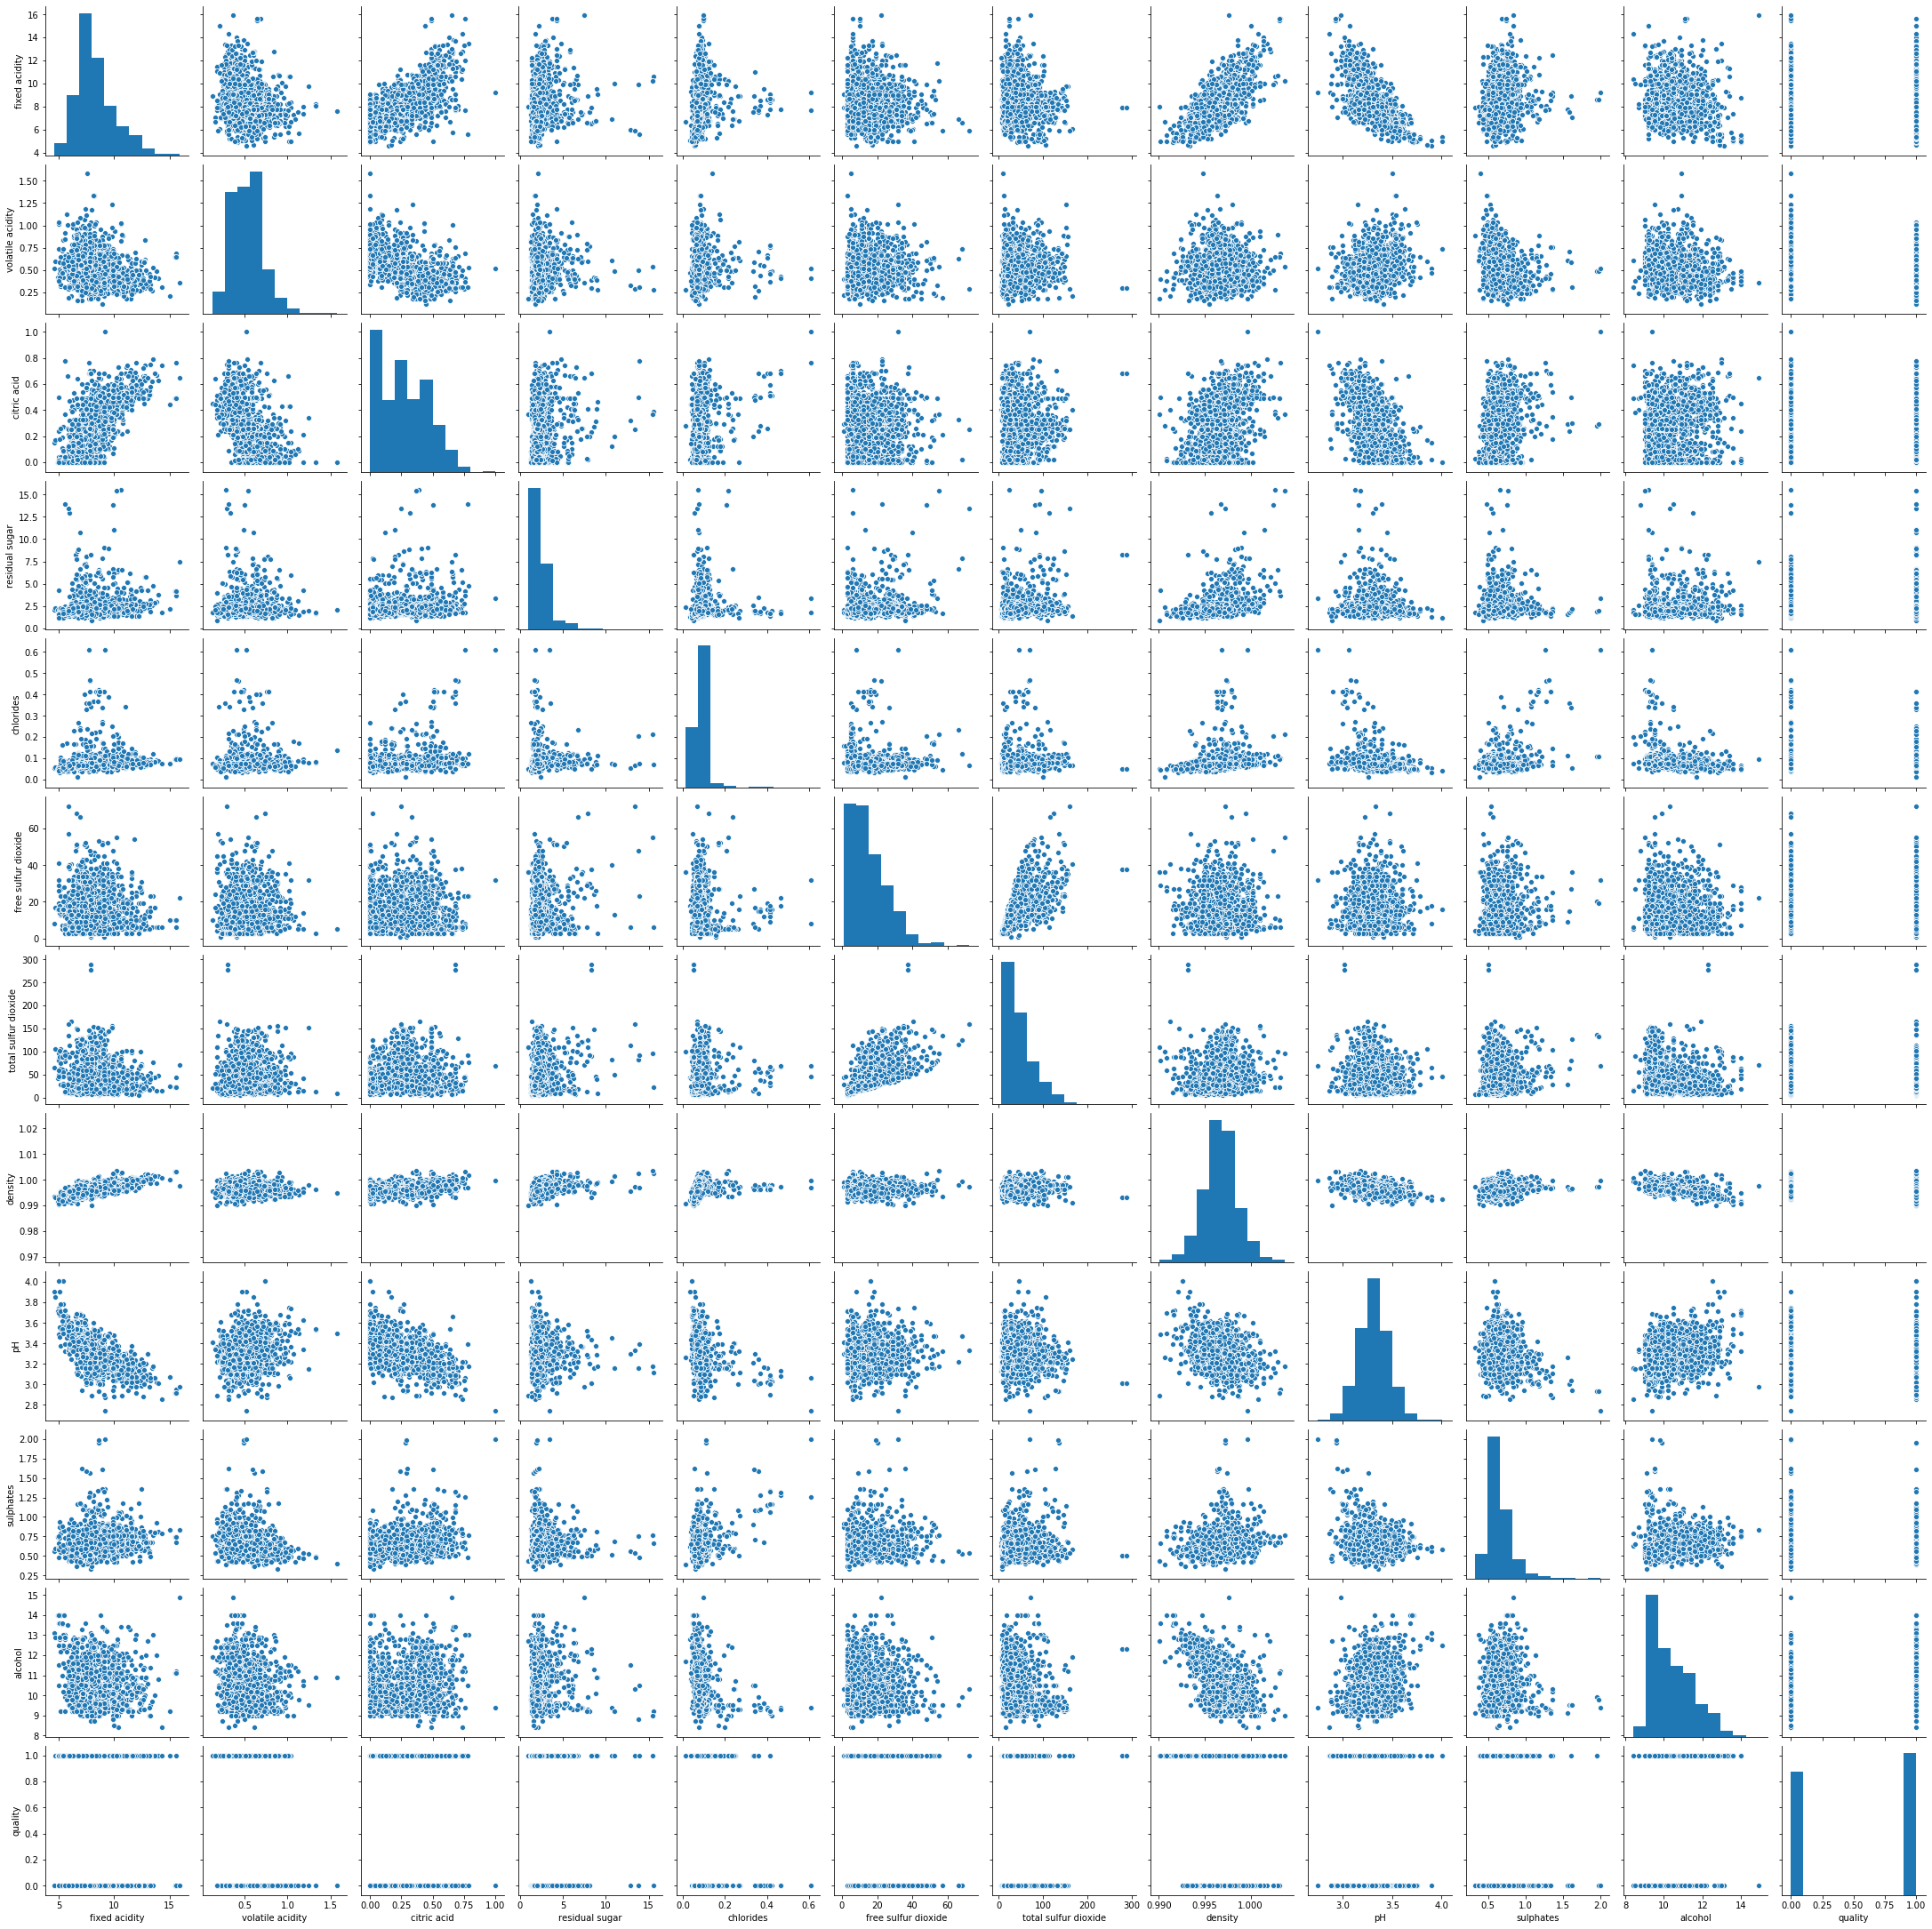

In [52]:
sns.pairplot(dataset)

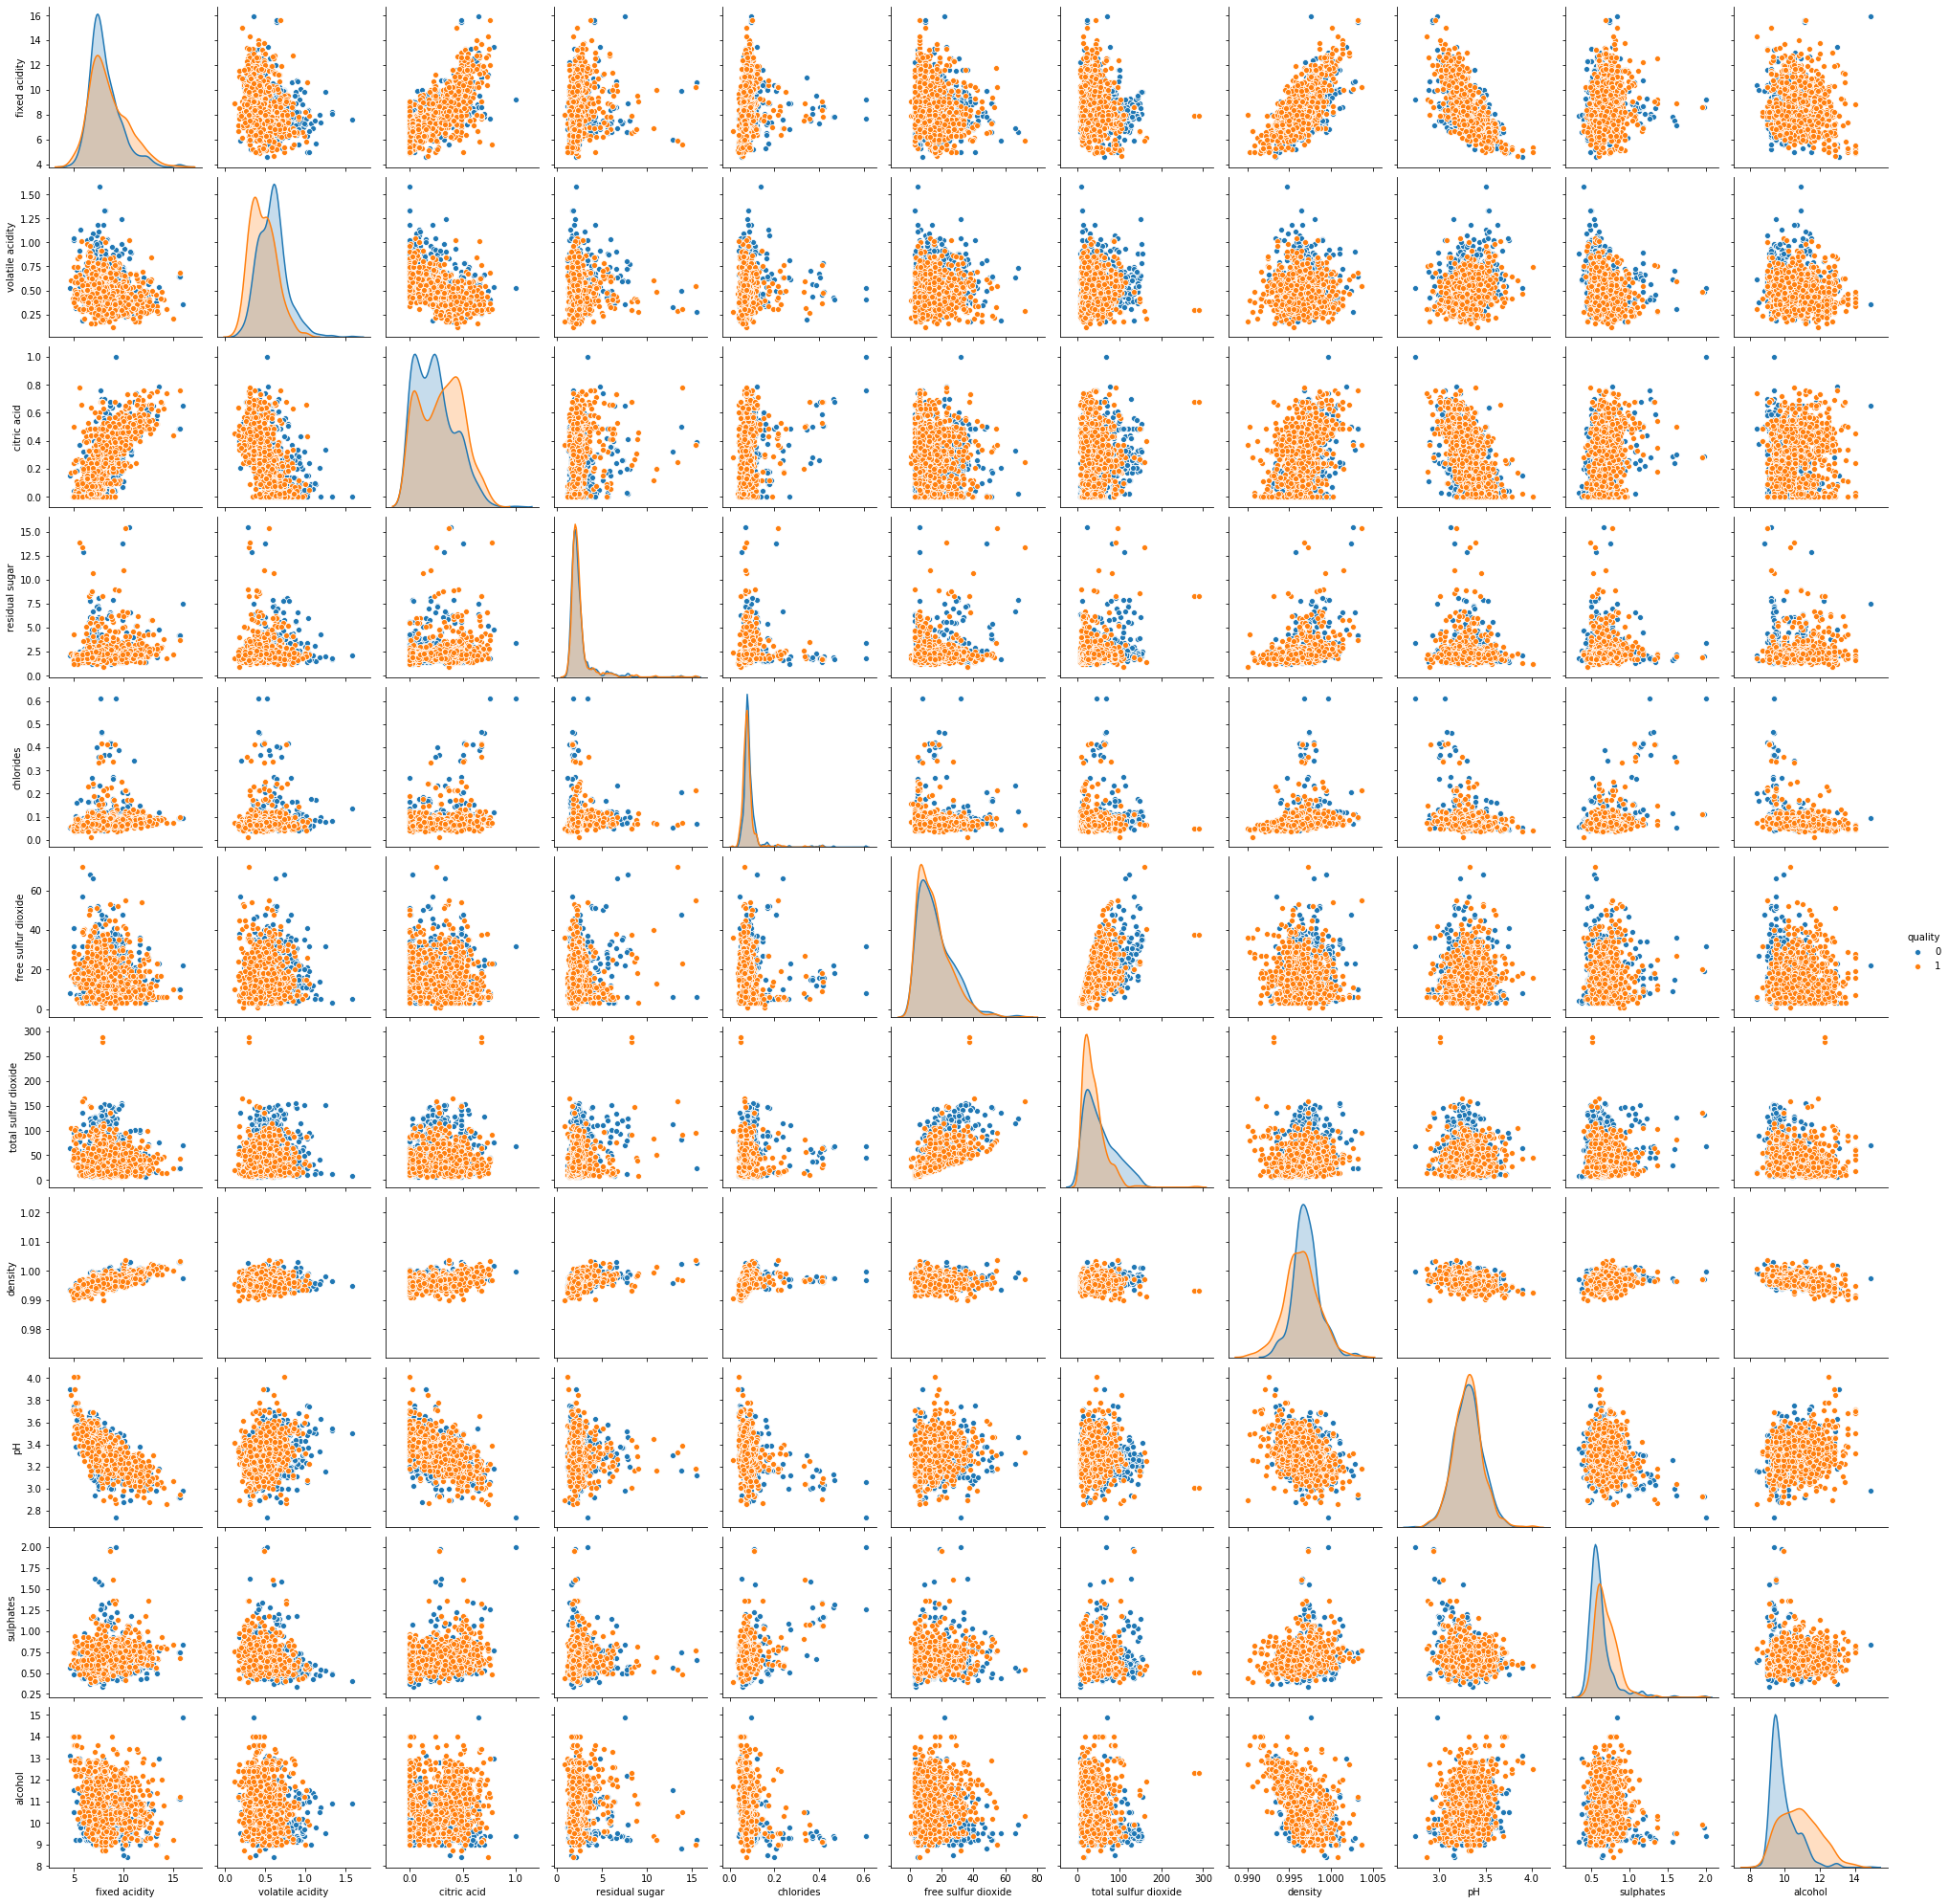

In [53]:
sns.pairplot(dataset,hue="quality")

In [54]:
# Trying to see it accuracy greater than the previous one can be achieved with SGDC
reg2.fit(x_train,y_train)
y_pred=reg2.predict(x_test)
print(y_pred)
accuracy_score(y_pred,y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 

0.5321969696969697

In [56]:
confusion_matrix(y_test,y_pred)



array([[  7, 244],
       [  3, 274]])

We can see that for logisti regression there was a huge jump in the accuracy after we have made ranges and provided labels
